## Binary Tree Nodes

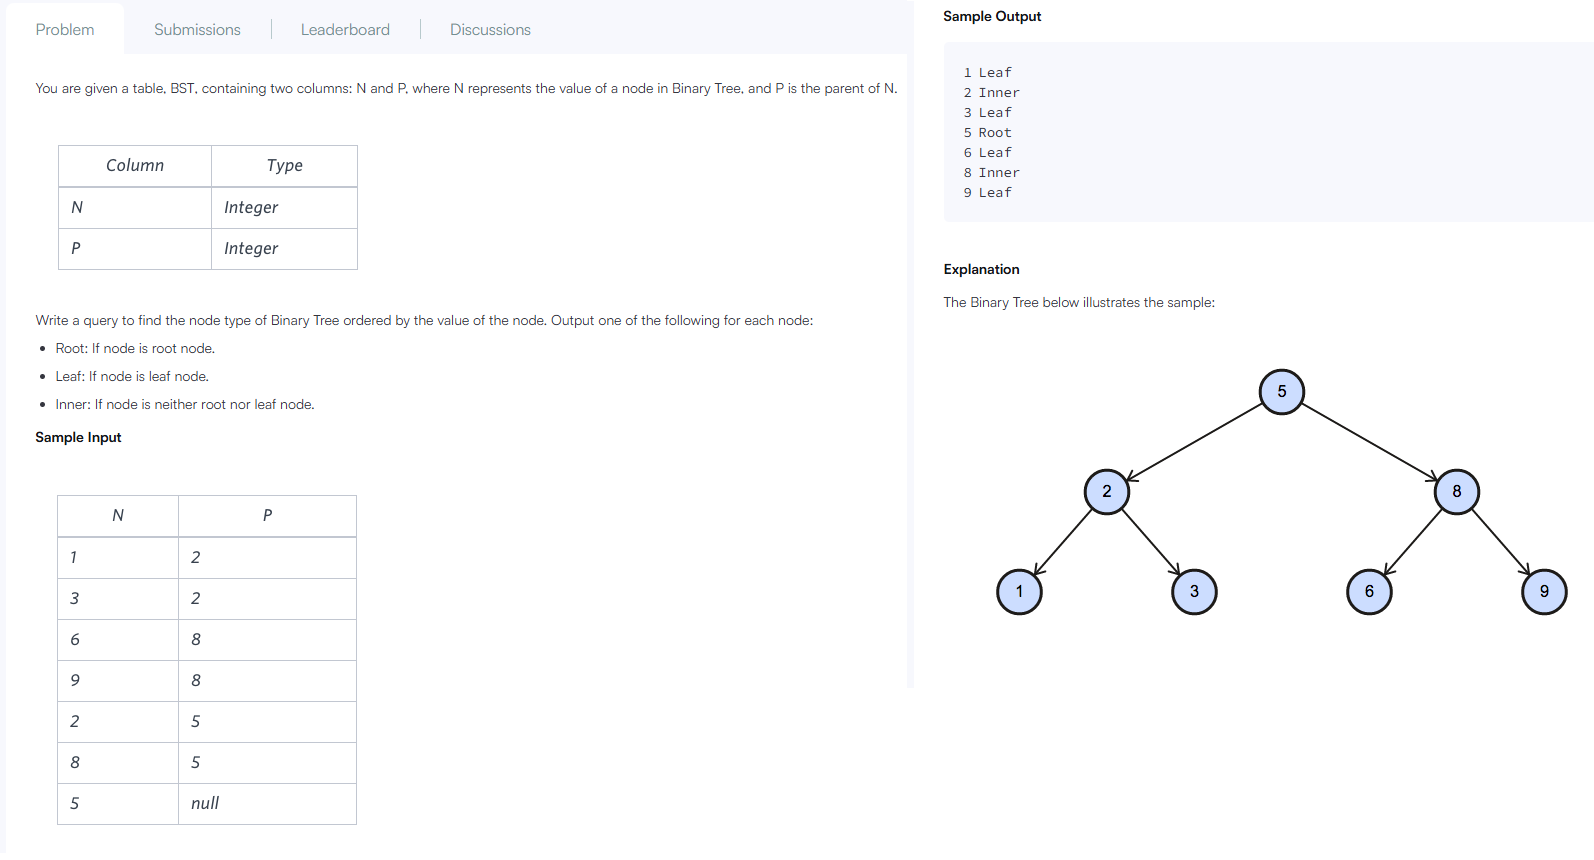

In [0]:
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, IntegerType
from pyspark.sql.functions import col, when, lit

In [0]:
spark = SparkSession.builder.appName('Binary Tree Nodes').getOrCreate()

In [0]:
bst_schema = StructType([StructField('colN', IntegerType(), False),
                         StructField('colP', IntegerType(), True)])

In [0]:
data = [(1, 2),(3, 2),(5, 6),(7, 6),(2, 4),(6, 4),(4, 15),(8, 9),(10, 9),(12, 13),(14, 13),(9, 11),(13, 11),(11, 15),(15, None)]

In [0]:
bst_df = spark.createDataFrame(data, schema = bst_schema)

In [0]:
display(bst_df)

colN,colP
1,2
3,2
5,6
7,6
2,4
6,4
4,15
8,9
10,9
12,13


In [0]:
bst_df.createOrReplaceTempView('bst_v')

## SQL Solution

In [0]:
%sql
select distinct a.colN, (case when b.colN is null then 'Leaf' 
                when a.colP is null then 'Root' 
            else 'Inner' end) as level
 from bst_v a left outer join bst_v b
on a.colN=b.ColP
order by a.colN

colN,level
1,Leaf
2,Inner
3,Leaf
4,Inner
5,Leaf
6,Inner
7,Leaf
8,Leaf
9,Inner
10,Leaf


## Pyspark Solution

In [0]:
result_df = bst_df.alias('a').join(bst_df.alias('b'), col('a.colN') == col('b.colP'), how='left')\
  .withColumn('level', when(col('b.colN').isNull(), lit('Leaf'))\
    .when(col('a.colP').isNull(), lit('Root'))\
      .otherwise(lit('Inner'))).select([col('a.colN'), col('level')]).distinct().orderBy(col('a.colN'))

display(result_df)

colN,level
1,Leaf
2,Inner
3,Leaf
4,Inner
5,Leaf
6,Inner
7,Leaf
8,Leaf
9,Inner
10,Leaf
